In [0]:
import os
import gc
import numpy as np
import pandas as pd
import pickle
from keras.layers import Dense, Input, Dropout,Flatten,MaxPooling1D,SpatialDropout2D,SpatialDropout1D
from keras.layers import Conv1D, MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers
from sklearn.preprocessing import Normalizer

In [0]:
with open('pca_500_x_pd','rb') as f:
    X = pickle.load(f)
with open('pca_y_pd','rb') as f:
    Y = pickle.load(f)

In [0]:
nor = Normalizer()

In [26]:
nor.fit(X)

Normalizer(copy=True, norm='l2')

In [0]:
X = nor.transform(X)

In [28]:
X.shape

(120975, 500)

In [29]:
Y.shape

(120975,)

In [0]:
learning_rate=0.0001
decay=0.0000001
momentum=0.99

dropout_rate = 0.15

rglrzr = regularizers.l2(0.0003)

In [55]:
model = Sequential()


model.add(Dense(500,activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(rate=dropout_rate))

model.add(Dense(500,activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(rate=dropout_rate))

model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=dropout_rate))

model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
batch_normalization_14 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_14 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
batch_normalization_15 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_15 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               50100     
__________

In [0]:
optimizer = optimizers.rmsprop(lr=learning_rate,decay=decay)
model.compile(loss='mse',
              optimizer=optimizer, 
              metrics=['mae','mse'])

In [0]:
cb=[]

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=0, mode='auto')
early_stopping = EarlyStopping(monitor='acc', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

#cb.append(reduce_lr)
cb.append(early_stopping)

In [58]:
history=model.fit(X, Y,
          batch_size=256,
          epochs=30,
          verbose=1,
          callbacks=cb,
          validation_split=0.3,
          shuffle=True)

Train on 84682 samples, validate on 36293 samples
Epoch 1/30
84682/84682 [==============================] - 9s 104us/step - loss: 2270.5164 - mean_absolute_error: 29.2759 - mean_squared_error: 2270.5164 - val_loss: 1942.8668 - val_mean_absolute_error: 25.0690 - val_mean_squared_error: 1942.8668
Epoch 2/30
 2560/84682 [..............................] - ETA: 6s - loss: 1099.9941 - mean_absolute_error: 24.3925 - mean_squared_error: 1099.9941

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


84682/84682 [==============================] - 7s 84us/step - loss: 1695.9440 - mean_absolute_error: 23.0927 - mean_squared_error: 1695.9440 - val_loss: 1641.9131 - val_mean_absolute_error: 21.8839 - val_mean_squared_error: 1641.9131
Epoch 3/30
84682/84682 [==============================] - 7s 85us/step - loss: 1387.7345 - mean_absolute_error: 20.1585 - mean_squared_error: 1387.7345 - val_loss: 1387.5922 - val_mean_absolute_error: 18.9666 - val_mean_squared_error: 1387.5922
Epoch 4/30
84682/84682 [==============================] - 7s 84us/step - loss: 1224.1410 - mean_absolute_error: 18.2220 - mean_squared_error: 1224.1410 - val_loss: 1240.3274 - val_mean_absolute_error: 17.0977 - val_mean_squared_error: 1240.3274
Epoch 5/30
84682/84682 [==============================] - 7s 84us/step - loss: 1122.2091 - mean_absolute_error: 16.5709 - mean_squared_error: 1122.2091 - val_loss: 1168.6749 - val_mean_absolute_error: 15.5434 - val_mean_squared_error: 1168.6749
Epoch 6/30
84682/84682 [=======

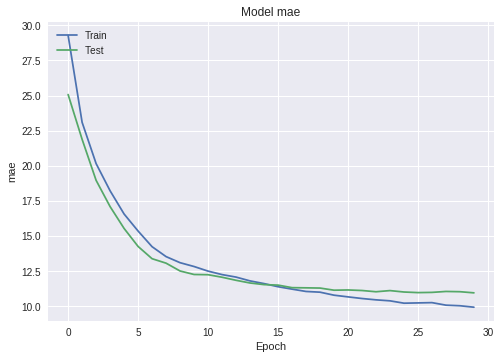

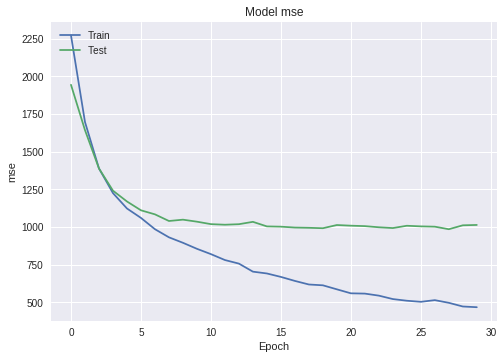

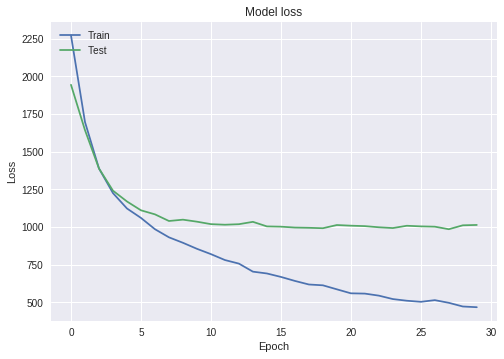

In [59]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()